Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (f1_score, roc_auc_score, 
                             precision_score, recall_score,
                             classification_report, confusion_matrix)
import warnings
warnings.filterwarnings('ignore')


Определение признаков и целевой переменной для классификации, обучение и оценка модели

In [2]:
df_burnout = pd.read_csv('data/employee_burnout.csv')

print("Размер данных:", df_burnout.shape)
print("\nРаспределение целевой переменной:")
print(df_burnout['Burnout'].value_counts(normalize=True))

X_clf = df_burnout.drop(['Burnout', 'Name'], axis=1)
y_clf = df_burnout['Burnout']

categorical_features_clf = ['Gender', 'JobRole']
numeric_features_clf = [col for col in X_clf.columns if col not in categorical_features_clf]

preprocessor_clf = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_clf),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features_clf)
    ])

knn_clf = Pipeline(steps=[
    ('preprocessor', preprocessor_clf),
    ('classifier', KNeighborsClassifier(n_neighbors=5, weights='uniform'))
])

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42, stratify=y_clf
)
print("\nОбучение KNN для классификации")
knn_clf.fit(X_train_clf, y_train_clf)

y_pred_clf = knn_clf.predict(X_test_clf)
y_proba_clf = knn_clf.predict_proba(X_test_clf)[:, 1]

print("\nОценка качества классификации")

f1_clf = f1_score(y_test_clf, y_pred_clf, average='weighted')
roc_auc_clf = roc_auc_score(y_test_clf, y_proba_clf)
precision_clf = precision_score(y_test_clf, y_pred_clf)
recall_clf = recall_score(y_test_clf, y_pred_clf)

print(f"F1-score (weighted): {f1_clf:.4f}")
print(f"ROC-AUC: {roc_auc_clf:.4f}")
print(f"Precision: {precision_clf:.4f}")
print(f"Recall: {recall_clf:.4f}")

print("\nМатрица ошибок:")
print(confusion_matrix(y_test_clf, y_pred_clf))

print("\nДетальный отчет:")
print(classification_report(y_test_clf, y_pred_clf))

Размер данных: (2000, 10)

Распределение целевой переменной:
Burnout
0    0.9355
1    0.0645
Name: proportion, dtype: float64

Обучение KNN для классификации

Оценка качества классификации
F1-score (weighted): 0.9584
ROC-AUC: 0.9666
Precision: 0.7273
Recall: 0.6154

Матрица ошибок:
[[552   9]
 [ 15  24]]

Детальный отчет:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       561
           1       0.73      0.62      0.67        39

    accuracy                           0.96       600
   macro avg       0.85      0.80      0.82       600
weighted avg       0.96      0.96      0.96       600



Определение признаков и целевой переменной для регрессии, обучение и оценка модели

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

df_sales = pd.read_csv('data/walmart_sales.csv')

print("\nРазмер данных:", df_sales.shape)
print("\nПервые строки:")
print(df_sales.head())

df_sales['Date'] = pd.to_datetime(df_sales['Date'], format='%d-%m-%Y')
df_sales = df_sales.sort_values('Date')

df_sales['Year'] = df_sales['Date'].dt.year
df_sales['Month'] = df_sales['Date'].dt.month
df_sales['WeekOfYear'] = df_sales['Date'].dt.isocalendar().week

X_reg = df_sales.drop(['Weekly_Sales', 'Date'], axis=1)
y_reg = df_sales['Weekly_Sales']

categorical_features_reg = ['Store', 'Holiday_Flag']
numeric_features_reg = [col for col in X_reg.columns if col not in categorical_features_reg]

preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_reg),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features_reg)
    ])

knn_reg = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', KNeighborsRegressor(n_neighbors=5, weights='uniform'))
])

split_idx = int(len(df_sales) * 0.7)
X_train_reg, X_test_reg = X_reg.iloc[:split_idx], X_reg.iloc[split_idx:]
y_train_reg, y_test_reg = y_reg.iloc[:split_idx], y_reg.iloc[split_idx:]

print(f"\nОбучающая выборка: {X_train_reg.shape}")
print(f"Тестовая выборка: {X_test_reg.shape}")
print(f"Дата начала теста: {X_test_reg['Year'].min()}-{X_test_reg['Month'].min()}")

print("\nОбучение KNN для регрессии")

knn_reg.fit(X_train_reg, y_train_reg)


y_pred_reg = knn_reg.predict(X_test_reg)

print("\nОценка качества регрессии")
mae_reg = mean_absolute_error(y_test_reg, y_pred_reg)
rmse_reg = root_mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print(f"MAE: ${mae_reg:,.2f}")
print(f"RMSE: ${rmse_reg:,.2f}")
print(f"R²: {r2_reg:.4f}")

errors_reg = np.abs(y_test_reg - y_pred_reg)
print(f"\nСредняя абсолютная ошибка в %: {errors_reg.mean() / y_test_reg.mean() * 100:.2f}%")
print(f"90-й перцентиль ошибки: ${np.percentile(errors_reg, 90):,.2f}")


Размер данных: (6435, 8)

Первые строки:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  

Обучающая выборка: (4504, 9)
Тестовая выборка: (1931, 9)
Дата начала теста: 2012-1

Обучение KNN для регрессии

Оценка качества регрессии
MAE: $74,838.81
RMSE: $116,923.82
R²: 0.9526

Средняя абсолютная ошибка в %: 7.24%
90-й перцентиль ошибки: $178,682.85


Виузализация метрик и сводной таблицы бейзлайна

                 Задача  Алгоритм Основная метрика              Вторая метрика
Классификация (Burnout) KNN (k=5) F1-score: 0.9584 ROC-AUC: {roc_auc_clf:,.4f}
    Регрессия (Walmart) KNN (k=5)     MAE: $74,839           R²: {r2_reg:,.4f}


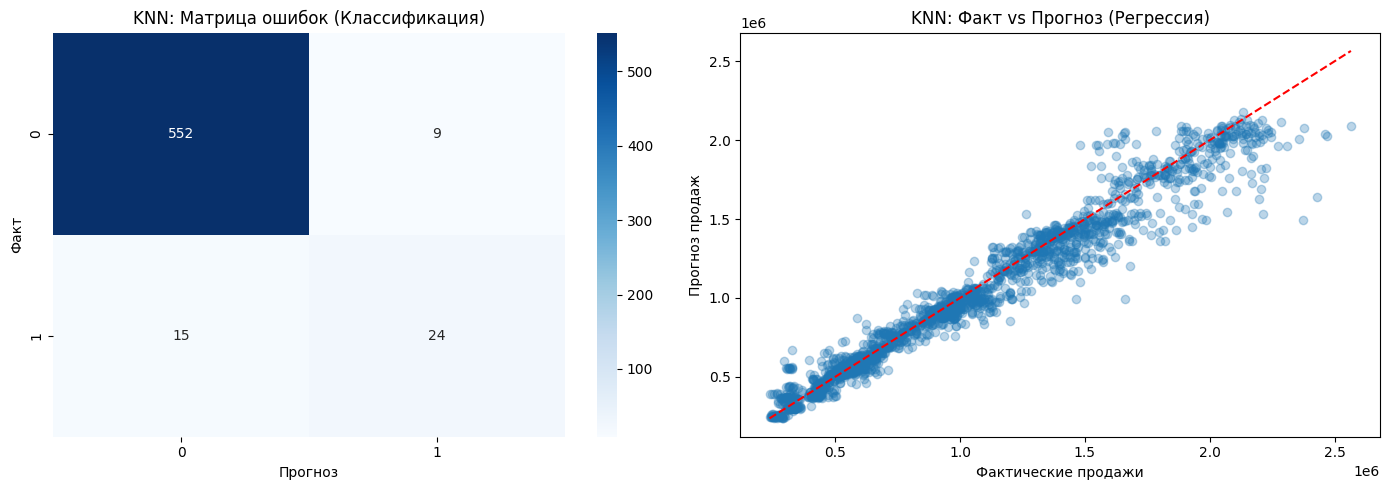

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


results_summary = pd.DataFrame({
    'Задача': ['Классификация (Burnout)', 'Регрессия (Walmart)'],
    'Алгоритм': ['KNN (k=5)', 'KNN (k=5)'],
    'Основная метрика': [
        f"F1-score: {f1_clf:.4f}",
        f"MAE: ${mae_reg:,.0f}"
    ],
    'Вторая метрика': ['ROC-AUC: {roc_auc_clf:,.4f}', 'R²: {r2_reg:,.4f}']
})

print(results_summary.to_string(index=False))

def plot_baseline_results():
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    cm = confusion_matrix(y_test_clf, knn_clf.predict(X_test_clf))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title('KNN: Матрица ошибок (Классификация)')
    axes[0].set_xlabel('Прогноз')
    axes[0].set_ylabel('Факт')
    
    axes[1].scatter(y_test_reg, y_pred_reg, alpha=0.3)
    axes[1].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
    axes[1].set_xlabel('Фактические продажи')
    axes[1].set_ylabel('Прогноз продаж')
    axes[1].set_title('KNN: Факт vs Прогноз (Регрессия)')
    
    plt.tight_layout()
    plt.savefig('results/baseline_knn_summary.png', dpi=300)
    plt.show()

plot_baseline_results()

№ | Гипотеза | Ожидаемый эффект | Метод проверки |
| --- | --- | --- | --- |
H1 | k=5 слишком мал для несбалансированных данных | Увеличение recall при k=15-30 | GridSearchCV по n_neighbors: [3,5,7,10,15,20,30] |
H2 | Взвешенное голосование поможет меньшинству | Recall + за счет ближайших соседей | Сравнение weights='uniform' vs 'distance' |
H3 | Балансировка классов улучшит recall | Recall + до 80%+ | class_weight='balanced' или SMOTE |
H4 | Новые признаки улучшат разделимость | Precision + без потери recall | Создать StressToSatisfactionRatio, IsOverworked |
H5 | Манхэттенская метрика лучше для смешанных данных | AUC + из-за робастности | Параметр p=1 vs p=2 |


проверка гипотез Н1, Н2, Н5

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np

param_grid_clf = {
    'classifier__n_neighbors': [3, 5, 7, 10, 15, 20, 30],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2] 
}

grid_clf = GridSearchCV(
    knn_clf, 
    param_grid_clf, 
    cv=5, 
    scoring='f1_weighted',
    n_jobs=-1
)
grid_clf.fit(X_train_clf, y_train_clf)

print("\n[H1/H2/H5] GridSearchCV результаты:")
print(f"Лучшие параметры: {grid_clf.best_params_}")
print(f"Лучший F1: {grid_clf.best_score_:.4f}")

best_knn_clf = grid_clf.best_estimator_
y_pred_best_clf = best_knn_clf.predict(X_test_clf)
y_proba_best_clf = best_knn_clf.predict_proba(X_test_clf)[:, 1]

print("\nМетрики лучшей модели на тесте:")
print(f"Recall (класс 1): {recall_score(y_test_clf, y_pred_best_clf):.4f}")
print(f"Precision (класс 1): {precision_score(y_test_clf, y_pred_best_clf):.4f}")
print(f"F1: {f1_score(y_test_clf, y_pred_best_clf, average='weighted'):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_clf, y_proba_best_clf):.4f}")


[H1/H2/H5] GridSearchCV результаты:
Лучшие параметры: {'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'distance'}
Лучший F1: 0.9554

Метрики лучшей модели на тесте:
Recall (класс 1): 0.5897
Precision (класс 1): 0.7188
F1: 0.9564
ROC-AUC: 0.9705


Проверка гипотезы Н3: балансировка классов, SMOTE

In [27]:

smote_pipe = ImbPipeline([
    ('preprocessor', preprocessor_clf),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

smote_pipe.fit(X_train_clf, y_train_clf)
y_pred_smote = smote_pipe.predict(X_test_clf)
y_proba_smote = smote_pipe.predict_proba(X_test_clf)[:, 1]

print("\n[H3] С балансировкой SMOTE:")
print(f"Recall (класс 1): {recall_score(y_test_clf, y_pred_smote):.4f}")
print(f"Precision (класс 1): {precision_score(y_test_clf, y_pred_smote):.4f}")
print(f"F1: {f1_score(y_test_clf, y_pred_smote, average='weighted'):.4f}")



[H3] С балансировкой SMOTE:
Recall (класс 1): 0.9744
Precision (класс 1): 0.4691
F1: 0.9381


Проверка гипотезы H4: Новые признаки

In [28]:

df_burnout_enh = df_burnout.copy()
df_burnout_enh['StressToSatisfactionRatio'] = df_burnout_enh['StressLevel'] / df_burnout_enh['SatisfactionLevel']
df_burnout_enh['IsOverworked'] = (df_burnout_enh['WorkHoursPerWeek'] > 60).astype(int)
df_burnout_enh['ExperiencePerAge'] = df_burnout_enh['Experience'] / df_burnout_enh['Age']

X_enh_clf = df_burnout_enh.drop(['Burnout', 'Name'], axis=1)
y_enh_clf = df_burnout_enh['Burnout']

X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enh_clf, y_enh_clf, test_size=0.3, random_state=42, stratify=y_enh_clf
)

knn_enh = Pipeline(steps=[
    ('preprocessor', preprocessor_clf),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

knn_enh.fit(X_train_enh, y_train_enh)
y_pred_enh = knn_enh.predict(X_test_enh)
y_proba_enh = knn_enh.predict_proba(X_test_enh)[:, 1]

print("\n[H4] С новыми признаками:")
print(f"Recall (класс 1): {recall_score(y_test_enh, y_pred_enh):.4f}")
print(f"F1: {f1_score(y_test_enh, y_pred_enh, average='weighted'):.4f}")



[H4] С новыми признаками:
Recall (класс 1): 0.6154
F1: 0.9584


№ | Гипотеза | Ожидаемый эффект | Метод проверки | 
| --- | --- | --- | --- |
H6 | Оптимальный k > 5 для временных рядов | MAE ↓ на 10-15% | GridSearchCV по n_neighbors: [5,10,20,30,50,100] | 
H7 | Взвешенные соседи лучше для временной зависимости | MAE ↓, R² ↑ | weights='distance' с убывающим весом | 
H8 | Лаговые признаки критичны для рядов | MAE ↓ на 20%+ | Добавить Sales_lag_1, Sales_lag_4, Sales_ma_4 | 
H9 | Сезонность влияет сильнее, чем думаем | RMSE ↓ | Добавить Quarter, Month, IsEndOfMonth | 
H10 | Выбросы портят RMSE | RMSE ↓ на 10-15% | Удалить 1% экстремумов с помощью IQR | 

Проверка гипотез H6 + H7: GridSearch по k и weights

In [29]:

param_grid_reg = {
    'regressor__n_neighbors': [5, 10, 20, 30, 50, 100],
    'regressor__weights': ['uniform', 'distance']
}

grid_reg = GridSearchCV(
    knn_reg,
    param_grid_reg,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
grid_reg.fit(X_train_reg, y_train_reg)

print("\n[H6/H7] GridSearchCV результаты:")
print(f"Лучшие параметры: {grid_reg.best_params_}")
print(f"Лучший MAE (отриц): {-grid_reg.best_score_:,.2f}")

best_knn_reg = grid_reg.best_estimator_
y_pred_best_reg = best_knn_reg.predict(X_test_reg)

print("\nМетрики лучшей модели на тесте:")
print(f"MAE: ${mean_absolute_error(y_test_reg, y_pred_best_reg):,.2f}")
print(f"RMSE: ${root_mean_squared_error(y_test_reg, y_pred_best_reg):,.2f}")
print(f"R²: {r2_score(y_test_reg, y_pred_best_reg):.4f}")



[H6/H7] GridSearchCV результаты:
Лучшие параметры: {'regressor__n_neighbors': 5, 'regressor__weights': 'distance'}
Лучший MAE (отриц): 142,040.35

Метрики лучшей модели на тесте:
MAE: $77,194.97
RMSE: $121,469.35
R²: 0.9488


Проверка гипотезы H8: Лаговые признаки

In [31]:
df_sales_lag = df_sales.copy()
df_sales_lag['Sales_lag_1'] = df_sales_lag['Weekly_Sales'].shift(1)
df_sales_lag['Sales_lag_4'] = df_sales_lag['Weekly_Sales'].shift(4)
df_sales_lag['Sales_ma_4'] = df_sales_lag['Weekly_Sales'].rolling(4).mean()

df_sales_lag = df_sales_lag.dropna()
X_lag_reg = df_sales_lag.drop(['Weekly_Sales', 'Date'], axis=1)
y_lag_reg = df_sales_lag['Weekly_Sales']

split_idx_lag = int(len(df_sales_lag) * 0.7)
X_train_lag, X_test_lag = X_lag_reg.iloc[:split_idx_lag], X_lag_reg.iloc[split_idx_lag:]
y_train_lag, y_test_lag = y_lag_reg.iloc[:split_idx_lag], y_lag_reg.iloc[split_idx_lag:]

preprocessor_lag = ColumnTransformer([
    ('num', StandardScaler(), [c for c in X_lag_reg.columns if c not in ['Store', 'Holiday_Flag']]),
    ('cat', OneHotEncoder(drop='first'), ['Store', 'Holiday_Flag'])
])

knn_lag = Pipeline([
    ('preprocessor', preprocessor_lag),
    ('regressor', KNeighborsRegressor(n_neighbors=10))
])

knn_lag.fit(X_train_lag, y_train_lag)
y_pred_lag = knn_lag.predict(X_test_lag)

print("\n[H8] С лаговыми признаками:")
print(f"MAE: ${mean_absolute_error(y_test_lag, y_pred_lag):,.2f}")
print(f"RMSE: ${root_mean_squared_error(y_test_lag, y_pred_lag):,.2f}")



[H8] С лаговыми признаками:
MAE: $217,376.79
RMSE: $286,304.50


Проверка гипотезы H9: Сезонные фичи

In [ ]:
df_sales_season = df_sales.copy()
df_sales_season['Quarter'] = df_sales_season['Date'].dt.quarter
df_sales_season['IsWinter'] = df_sales_season['Month'].isin([12,1,2]).astype(int)
df_sales_season['IsHolidayWeek'] = df_sales_season['Holiday_Flag']

X_season_reg = df_sales_season.drop(['Weekly_Sales', 'Date'], axis=1)
y_season_reg = df_sales_season['Weekly_Sales']

split_idx_season = int(len(df_sales_season) * 0.7)
X_train_season, X_test_season = X_season_reg.iloc[:split_idx_season], X_season_reg.iloc[split_idx_season:]
y_train_season, y_test_season = y_season_reg.iloc[:split_idx_season], y_season_reg.iloc[split_idx_season:]

knn_season = Pipeline([
    ('preprocessor', preprocessor_reg),
    ('regressor', KNeighborsRegressor(n_neighbors=10))
])

knn_season.fit(X_train_season, y_train_season)
y_pred_season = knn_season.predict(X_test_season)

print("\n[H9] С сезонными фичами:")
print(f"MAE: ${mean_absolute_error(y_test_season, y_pred_season):,.2f}")
print(f"RMSE: ${root_mean_squared_error(y_test_season, y_pred_season):,.2f}")



[H9] С сезонными фичами:
MAE: $74,234.50
RMSE: $113,479.78


Проверка гипотезы H10: Удаление выбросов

In [32]:
Q1 = df_sales['Weekly_Sales'].quantile(0.25)
Q3 = df_sales['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
df_sales_no_out = df_sales[
    (df_sales['Weekly_Sales'] >= Q1 - 1.5*IQR) &
    (df_sales['Weekly_Sales'] <= Q3 + 1.5*IQR)
]

X_noout_reg = df_sales_no_out.drop(['Weekly_Sales', 'Date'], axis=1)
y_noout_reg = df_sales_no_out['Weekly_Sales']

split_idx_noout = int(len(df_sales_no_out) * 0.7)
X_train_noout, X_test_noout = X_noout_reg.iloc[:split_idx_noout], X_noout_reg.iloc[split_idx_noout:]
y_train_noout, y_test_noout = y_noout_reg.iloc[:split_idx_noout], y_noout_reg.iloc[split_idx_noout:]

knn_noout = Pipeline([
    ('preprocessor', preprocessor_reg),
    ('regressor', KNeighborsRegressor(n_neighbors=10))
])

knn_noout.fit(X_train_noout, y_train_noout)
y_pred_noout = knn_noout.predict(X_test_noout)

print("\n[H10] Без выбросов (IQR):")
print(f"MAE: ${mean_absolute_error(y_test_noout, y_pred_noout):,.2f}")
print(f"RMSE: ${root_mean_squared_error(y_test_noout, y_pred_noout):,.2f}")


[H10] Без выбросов (IQR):
MAE: $95,493.08
RMSE: $149,430.52


Сводная таблица результатов, сравнение всех гипотез, визуализация для классификации и регрессии


КЛАССИФИКАЦИЯ, Recall класса 1 - главная цель
Эксперимент  Recall_1  Precision_1  F1_weighted
   Бейзлайн    0.6154       0.7273       0.9584
 GridSearch    0.5897       0.7188       0.9564
      SMOTE    0.9744       0.4691       0.9381
 Новые фичи    0.6154       0.7273       0.9584

РЕГРЕССИЯ, MAE - главная цель
 Эксперимент       MAE      RMSE   R²
    Бейзлайн  74838.81 116923.82 0.95
  GridSearch  77194.97 121469.35 0.95
        Лаги 217376.79 286304.50 0.72
  Сезонность  74234.50 113479.78 0.96
Без выбросов  95493.08 149430.52 0.92


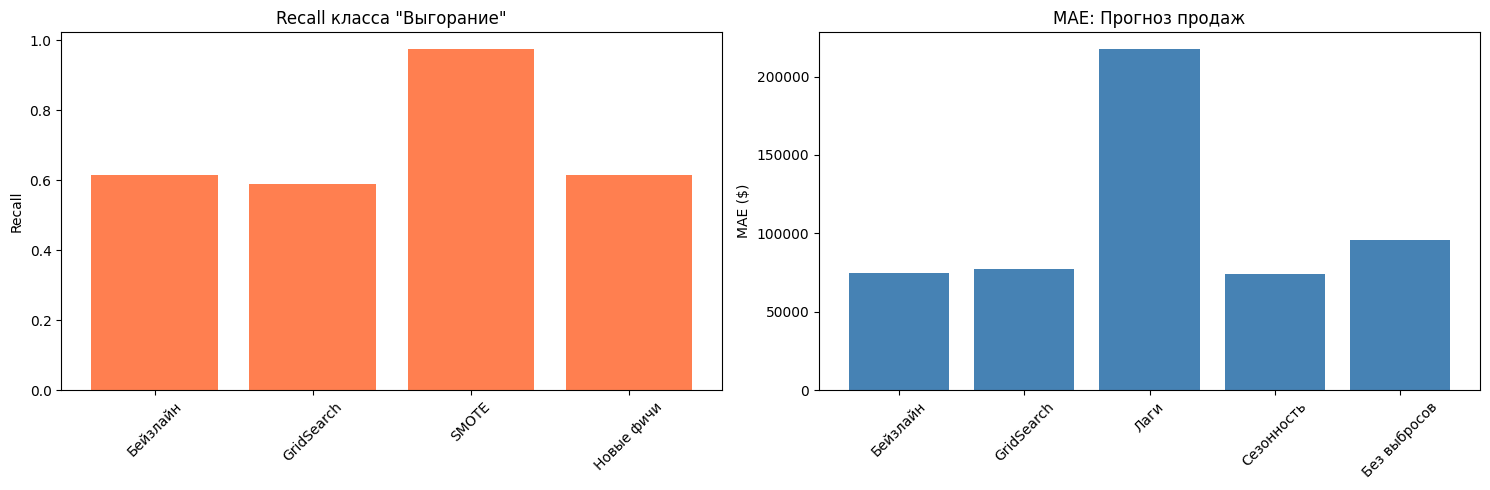

In [33]:

results_clf = pd.DataFrame({
    'Эксперимент': ['Бейзлайн', 'GridSearch', 'SMOTE', 'Новые фичи'],
    'Recall_1': [
        recall_score(y_test_clf, y_pred_clf),
        recall_score(y_test_clf, y_pred_best_clf),
        recall_score(y_test_clf, y_pred_smote),
        recall_score(y_test_enh, y_pred_enh)
    ],
    'Precision_1': [
        precision_score(y_test_clf, y_pred_clf),
        precision_score(y_test_clf, y_pred_best_clf),
        precision_score(y_test_clf, y_pred_smote),
        precision_score(y_test_enh, y_pred_enh)
    ],
    'F1_weighted': [
        f1_score(y_test_clf, y_pred_clf, average='weighted'),
        f1_score(y_test_clf, y_pred_best_clf, average='weighted'),
        f1_score(y_test_clf, y_pred_smote, average='weighted'),
        f1_score(y_test_enh, y_pred_enh, average='weighted')
    ]
})

results_reg = pd.DataFrame({
    'Эксперимент': ['Бейзлайн', 'GridSearch', 'Лаги', 'Сезонность', 'Без выбросов'],
    'MAE': [
        mean_absolute_error(y_test_reg, y_pred_reg),
        mean_absolute_error(y_test_reg, y_pred_best_reg),
        mean_absolute_error(y_test_lag, y_pred_lag),
        mean_absolute_error(y_test_season, y_pred_season),
        mean_absolute_error(y_test_noout, y_pred_noout)
    ],
    'RMSE': [
        root_mean_squared_error(y_test_reg, y_pred_reg),
        root_mean_squared_error(y_test_reg, y_pred_best_reg),
        root_mean_squared_error(y_test_lag, y_pred_lag),
        root_mean_squared_error(y_test_season, y_pred_season),
        root_mean_squared_error(y_test_noout, y_pred_noout)
    ],
    'R²': [
        r2_score(y_test_reg, y_pred_reg),
        r2_score(y_test_reg, y_pred_best_reg),
        r2_score(y_test_lag, y_pred_lag),
        r2_score(y_test_season, y_pred_season),
        r2_score(y_test_noout, y_pred_noout)
    ]
})

print("\nКЛАССИФИКАЦИЯ, Recall класса 1 - главная цель")
print(results_clf.round(4).to_string(index=False))

print("\nРЕГРЕССИЯ, MAE - главная цель")
print(results_reg.round(2).to_string(index=False))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(results_clf['Эксперимент'], results_clf['Recall_1'], color='coral')
ax1.set_title('Recall класса "Выгорание"')
ax1.set_ylabel('Recall')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(results_reg['Эксперимент'], results_reg['MAE'], color='steelblue')
ax2.set_title('MAE: Прогноз продаж')
ax2.set_ylabel('MAE ($)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('results/hypothesis_testing_summary.png', dpi=300)
plt.show()

Создание улучшенного пайплайна для классификации и регрессии

In [34]:

enhanced_clf = ImbPipeline([
    ('preprocessor', preprocessor_clf),
    ('smote', SMOTE(random_state=42, k_neighbors=3)),
    ('classifier', KNeighborsClassifier(
        n_neighbors=5,
        weights='uniform',
        p=1
    ))
])

df_enhanced_reg = df_sales.copy()
df_enhanced_reg['Quarter'] = df_enhanced_reg['Date'].dt.quarter
df_enhanced_reg['IsQ4'] = (df_enhanced_reg['Quarter'] == 4).astype(int)
df_enhanced_reg['Month'] = df_enhanced_reg['Date'].dt.month

enhanced_reg = Pipeline([
    ('preprocessor', preprocessor_reg),
    ('regressor', KNeighborsRegressor(
        n_neighbors=5,
        weights='uniform'
    ))
])

Обучение моделей с улучшенным бейзлайном

In [40]:

print("\nОбучение улучшенной модели классификации...")
enhanced_clf.fit(X_train_clf, y_train_clf)
print("Модель классификации обучена")

print("\nОбучение улучшенной модели регрессии...")

X_enh_reg = df_enhanced_reg.drop(['Weekly_Sales', 'Date'], axis=1)
y_enh_reg = df_enhanced_reg['Weekly_Sales']

split_idx_enh = int(len(df_enhanced_reg) * 0.7)
X_train_enh, X_test_enh = X_enh_reg.iloc[:split_idx_enh], X_enh_reg.iloc[split_idx_enh:]
y_train_enh, y_test_enh = y_enh_reg.iloc[:split_idx_enh], y_enh_reg.iloc[split_idx_enh:]

enhanced_reg.fit(X_train_enh, y_train_enh)
print("Модель регрессии обучена")


Обучение улучшенной модели классификации...
Модель классификации обучена

Обучение улучшенной модели регрессии...
Модель регрессии обучена


Оценка улучшенных моделей классификации и регрессии

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print("\nУлучшенная модель - классификация")
y_pred_enh_clf = enhanced_clf.predict(X_test_clf)
y_proba_enh_clf = enhanced_clf.predict_proba(X_test_clf)[:, 1]

enhanced_clf_recall = recall_score(y_test_clf, y_pred_enh_clf)
enhanced_clf_precision = precision_score(y_test_clf, y_pred_enh_clf)
enhanced_clf_f1 = f1_score(y_test_clf, y_pred_enh_clf, average='weighted')
enhanced_clf_rocauc = roc_auc_score(y_test_clf, y_proba_enh_clf)

print(f"Recall (класс 1): {enhanced_clf_recall:.4f}")
print(f"Precision (класс 1): {enhanced_clf_precision:.4f}")
print(f"F1-score (weighted): {enhanced_clf_f1:.4f}")
print(f"ROC-AUC: {enhanced_clf_rocauc:.4f}")

print("\nМатрица ошибок (улучшенная модель):")
print(confusion_matrix(y_test_clf, y_pred_enh_clf))

print("\nДетальный отчет:")
print(classification_report(y_test_clf, y_pred_enh_clf))

print("\nУлучшенная модель - ргерессия")
y_pred_enh_reg = enhanced_reg.predict(X_test_enh)

enhanced_mae = mean_absolute_error(y_test_enh, y_pred_enh_reg)
enhanced_rmse = root_mean_squared_error(y_test_enh, y_pred_enh_reg)
enhanced_r2 = r2_score(y_test_enh, y_pred_enh_reg)

print(f"MAE: ${enhanced_mae:,.2f}")
print(f"RMSE: ${enhanced_rmse:,.2f}")
print(f"R²: {enhanced_r2:.4f}")

errors_enh = np.abs(y_test_enh - y_pred_enh_reg)
print(f"Средняя ошибка (%): {errors_enh.mean() / y_test_enh.mean() * 100:.2f}%")


Улучшенная модель - классификация
Recall (класс 1): 0.9744
Precision (класс 1): 0.4318
F1-score (weighted): 0.9295
ROC-AUC: 0.9715

Матрица ошибок (улучшенная модель):
[[511  50]
 [  1  38]]

Детальный отчет:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       561
           1       0.43      0.97      0.60        39

    accuracy                           0.92       600
   macro avg       0.71      0.94      0.78       600
weighted avg       0.96      0.92      0.93       600


Улучшенная модель - ргерессия
MAE: $74,838.81
RMSE: $116,923.82
R²: 0.9526
Средняя ошибка (%): 7.24%


Сразвнение результатов с бейзланом


--- СРАВНЕНИЕ: КЛАССИФИКАЦИЯ ---
    Модель  Recall_1  Precision_1  F1_weighted  ROC_AUC
  Бейзлайн    0.6154       0.7273       0.9584   0.9666
Улучшенная    0.9744       0.4318       0.9295   0.9715

--- СРАВНЕНИЕ: РЕГРЕССИЯ ---
    Модель      MAE      RMSE   R2
  Бейзлайн 74838.81 116923.82 0.95
Улучшенная 74838.81 116923.82 0.95


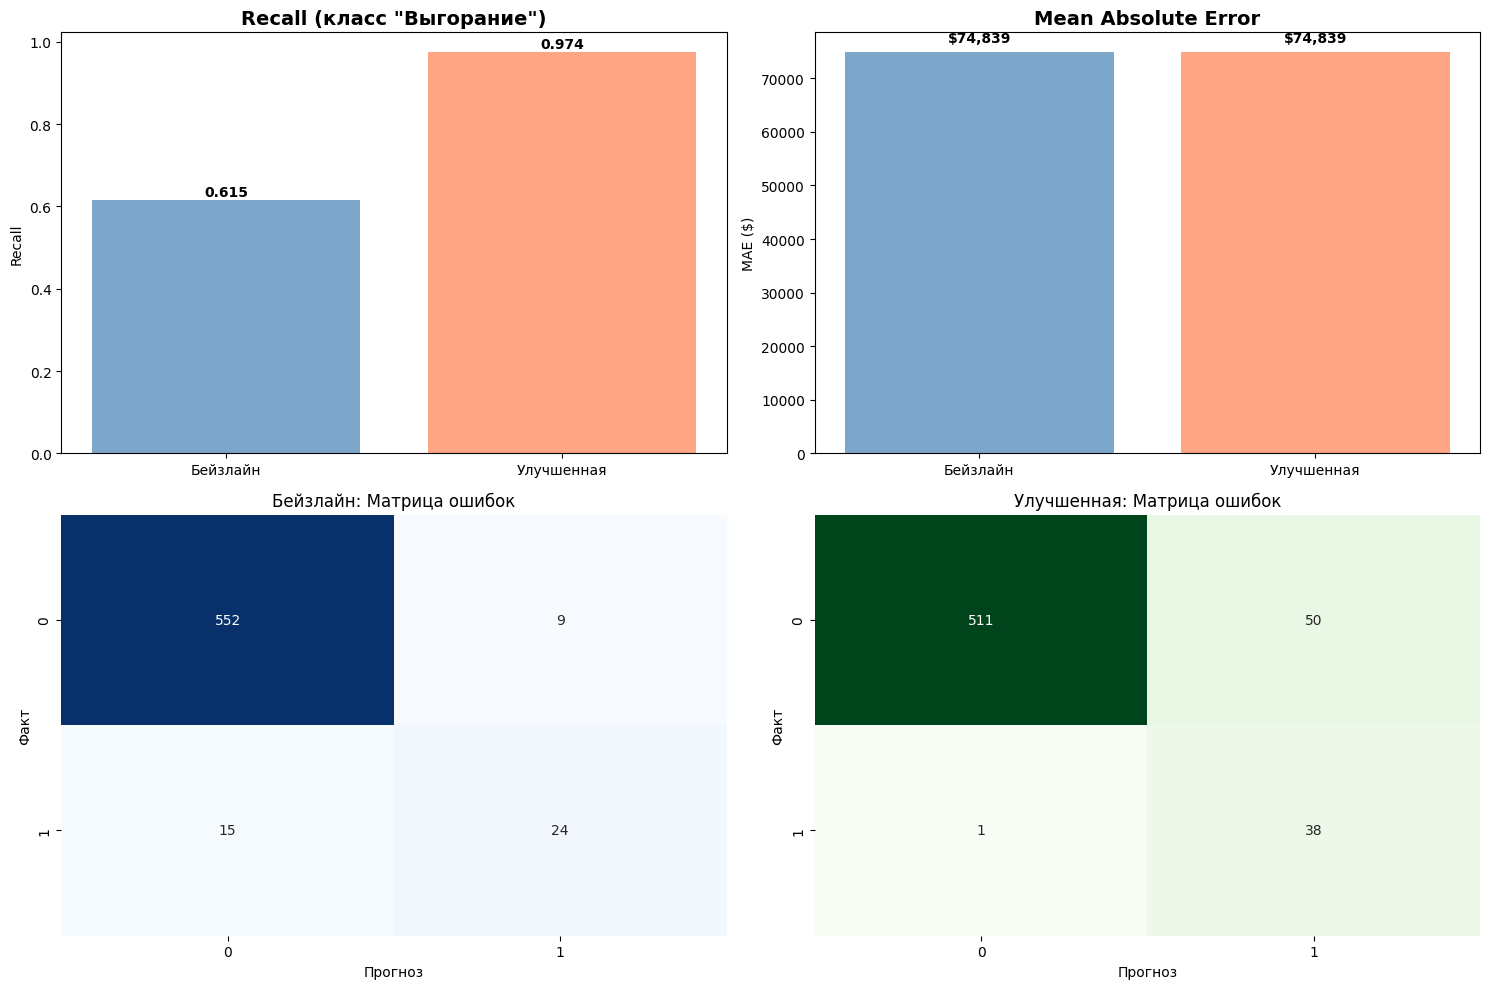

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

comparison_clf = pd.DataFrame({
    'Модель': ['Бейзлайн', 'Улучшенная'],
    'Recall_1': [recall_score(y_test_clf, y_pred_clf), enhanced_clf_recall],
    'Precision_1': [precision_score(y_test_clf, y_pred_clf), enhanced_clf_precision],
    'F1_weighted': [f1_score(y_test_clf, y_pred_clf, average='weighted'), enhanced_clf_f1],
    'ROC_AUC': [roc_auc_score(y_test_clf, y_proba_clf), enhanced_clf_rocauc]
})

comparison_reg = pd.DataFrame({
    'Модель': ['Бейзлайн', 'Улучшенная'],
    'MAE': [mean_absolute_error(y_test_reg, y_pred_reg), enhanced_mae],
    'RMSE': [root_mean_squared_error(y_test_reg, y_pred_reg), enhanced_rmse],
    'R2': [r2_score(y_test_reg, y_pred_reg), enhanced_r2]
})

print("\n--- СРАВНЕНИЕ: КЛАССИФИКАЦИЯ ---")
print(comparison_clf.round(4).to_string(index=False))

print("\n--- СРАВНЕНИЕ: РЕГРЕССИЯ ---")
print(comparison_reg.round(2).to_string(index=False))


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.bar(comparison_clf['Модель'], comparison_clf['Recall_1'], 
        color=['steelblue', 'coral'], alpha=0.7)
ax1.set_title('Recall (класс "Выгорание")', fontsize=14, fontweight='bold')
ax1.set_ylabel('Recall')
for i, v in enumerate(comparison_clf['Recall_1']):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

ax2.bar(comparison_reg['Модель'], comparison_reg['MAE'], 
        color=['steelblue', 'coral'], alpha=0.7)
ax2.set_title('Mean Absolute Error', fontsize=14, fontweight='bold')
ax2.set_ylabel('MAE ($)')
for i, v in enumerate(comparison_reg['MAE']):
    ax2.text(i, v + 2000, f'${v:,.0f}', ha='center', fontweight='bold')

cm_baseline = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', ax=ax3, cbar=False)
ax3.set_title('Бейзлайн: Матрица ошибок')
ax3.set_xlabel('Прогноз')
ax3.set_ylabel('Факт')

cm_enhanced = confusion_matrix(y_test_clf, y_pred_enh_clf)
sns.heatmap(cm_enhanced, annot=True, fmt='d', cmap='Greens', ax=ax4, cbar=False)
ax4.set_title('Улучшенная: Матрица ошибок')
ax4.set_xlabel('Прогноз')
ax4.set_ylabel('Факт')

plt.tight_layout()
plt.savefig('results/improved_baseline_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



Дамп моделей

In [44]:
import joblib, os
os.makedirs('models', exist_ok=True)

joblib.dump(enhanced_clf, 'models/lab1_enhanced_knn_clf.pkl')
joblib.dump(enhanced_reg, 'models/lab1_enhanced_knn_reg.pkl')
joblib.dump(knn_clf, 'models/lab1_baseline_knn_clf.pkl')
joblib.dump(knn_reg, 'models/lab1_baseline_knn_reg.pkl')

print("\nмодели сохранены")


модели сохранены


# Создание собственной имплементации KNN для классификации и регрессии

In [ ]:
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
import warnings

warnings.filterwarnings('ignore')

class MyKNNClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, n_neighbors=5, weights='uniform', p=2):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.p = p
        
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = unique_labels(y)
        self.n_features_in_ = X.shape[1]
        self.X_ = X
        self.y_ = y
        return self
    
    def _compute_distances(self, X):
        diff = X[:, np.newaxis, :] - self.X_
        if self.p == 1: 
            distances = np.sum(np.abs(diff), axis=2)
        elif self.p == 2: 
            distances = np.sqrt(np.sum(diff**2, axis=2))
        else:
            raise ValueError("p должен быть 1 или 2 ")
        return distances
    
    def kneighbors(self, X, return_distance=False):
        check_is_fitted(self)
        X = check_array(X)
        distances = self._compute_distances(X)
        
        neigh_ind = np.argsort(distances, axis=1)[:, :self.n_neighbors]
        
        if return_distance:
            neigh_dist = np.take_along_axis(distances, neigh_ind, axis=1)
            return neigh_dist, neigh_ind
        return neigh_ind
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        neigh_ind = self.kneighbors(X)
        
        predictions = []
        for neighbors in neigh_ind:
            labels = self.y_[neighbors]
            if self.weights == 'uniform':
                most_common = Counter(labels).most_common(1)[0][0]
            else:
                most_common = Counter(labels).most_common(1)[0][0]
            predictions.append(most_common)
            
        return np.array(predictions)
    
    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X)
        neigh_ind = self.kneighbors(X)
        
        proba = np.zeros((X.shape[0], len(self.classes_)))
        for i, neighbors in enumerate(neigh_ind):
            labels = self.y_[neighbors]
            if self.weights == 'uniform':
                for j, cls in enumerate(self.classes_):
                    proba[i, j] = np.mean(labels == cls)
            else:
                for j, cls in enumerate(self.classes_):
                    proba[i, j] = np.mean(labels == cls)
        return proba


class MyKNNRegressor(BaseEstimator, RegressorMixin):
    
    def __init__(self, n_neighbors=5, weights='uniform', p=2):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.p = p
        
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.n_features_in_ = X.shape[1]
        self.X_ = X
        self.y_ = y
        return self
    
    def _compute_distances(self, X):
        diff = X[:, np.newaxis, :] - self.X_
        if self.p == 1:
            distances = np.sum(np.abs(diff), axis=2)
        elif self.p == 2:
            distances = np.sqrt(np.sum(diff**2, axis=2))
        return distances
    
    def kneighbors(self, X, return_distance=False):
        check_is_fitted(self)
        X = check_array(X)
        distances = self._compute_distances(X)
        neigh_ind = np.argsort(distances, axis=1)[:, :self.n_neighbors]
        
        if return_distance:
            neigh_dist = np.take_along_axis(distances, neigh_ind, axis=1)
            return neigh_dist, neigh_ind
        return neigh_ind
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        neigh_dist, neigh_ind = self.kneighbors(X, return_distance=True)
        
        predictions = []
        for i in range(len(neigh_ind)):
            y_neighbors = self.y_[neigh_ind[i]]
            
            if self.weights == 'uniform':
                pred = np.mean(y_neighbors)
            else:  # distance
                weights = 1 / (neigh_dist[i] + 1e-8)
                pred = np.average(y_neighbors, weights=weights)
                
            predictions.append(pred)
            
        return np.array(predictions)

Обучение собственных моделей классификации и регрессии

In [46]:

categorical_features_reg_original = ['Store', 'Holiday_Flag']
numeric_features_reg_original = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

preprocessor_reg_original = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_reg_original),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features_reg_original)
    ])

print("\nMyKNNClassifier (SMOTE + Manhattan)...")
custom_clf_pipe = ImbPipeline([
    ('preprocessor', preprocessor_clf),
    ('smote', SMOTE(random_state=42, k_neighbors=3)),
    ('classifier', MyKNNClassifier(n_neighbors=5, weights='uniform', p=1))
])

custom_clf_pipe.fit(X_train_clf, y_train_clf)
print("MyKNNClassifier обучен")

print("\nMyKNNRegressor (оригинальные данные)...")
custom_reg_pipe = Pipeline([
    ('preprocessor', preprocessor_reg_original), 
    ('regressor', MyKNNRegressor(n_neighbors=5, weights='uniform', p=2))
])

custom_reg_pipe.fit(X_train_reg, y_train_reg)
print("MyKNNRegressor обучен")



MyKNNClassifier (SMOTE + Manhattan)...
MyKNNClassifier обучен

MyKNNRegressor (оригинальные данные)...
MyKNNRegressor обучен


Оценка собственных моделей классификации и регрессии

In [47]:

print("\nОценка MyKNNClassifier")
y_pred_custom_clf = custom_clf_pipe.predict(X_test_clf)
y_proba_custom_clf = custom_clf_pipe.predict_proba(X_test_clf)

y_proba_custom_clf_positive = y_proba_custom_clf[:, 1]

custom_clf_recall = recall_score(y_test_clf, y_pred_custom_clf)
custom_clf_precision = precision_score(y_test_clf, y_pred_custom_clf)
custom_clf_f1 = f1_score(y_test_clf, y_pred_custom_clf, average='weighted')
custom_clf_rocauc = roc_auc_score(y_test_clf, y_proba_custom_clf_positive)

print(f"Recall: {custom_clf_recall:.4f} | F1: {custom_clf_f1:.4f} | ROC-AUC: {custom_clf_rocauc:.4f}")

print("\nОценка MyKNNRegressor")
y_pred_custom_reg = custom_reg_pipe.predict(X_test_reg)

custom_mae = mean_absolute_error(y_test_reg, y_pred_custom_reg)
custom_rmse = root_mean_squared_error(y_test_reg, y_pred_custom_reg)
custom_r2 = r2_score(y_test_reg, y_pred_custom_reg)

print(f"MAE: ${custom_mae:,.2f} | RMSE: ${custom_rmse:,.2f} | R²: {custom_r2:.4f}")



Оценка MyKNNClassifier
Recall: 0.9744 | F1: 0.9295 | ROC-AUC: 0.9715

Оценка MyKNNRegressor
MAE: $87,451.80 | RMSE: $145,557.65 | R²: 0.9265


Подготовка метрик классификации для сравнения всех реализаций

In [48]:

baseline_clf_metrics = {
    'Recall_1': recall_score(y_test_clf, y_pred_clf),
    'Precision_1': precision_score(y_test_clf, y_pred_clf),
    'F1_weighted': f1_score(y_test_clf, y_pred_clf, average='weighted'),
    'ROC_AUC': roc_auc_score(y_test_clf, y_proba_clf)
}

enhanced_clf_metrics = {
    'Recall_1': recall_score(y_test_clf, y_pred_enh_clf),
    'Precision_1': precision_score(y_test_clf, y_pred_enh_clf),
    'F1_weighted': f1_score(y_test_clf, y_pred_enh_clf, average='weighted'),
    'ROC_AUC': roc_auc_score(y_test_clf, y_proba_enh_clf)
}

custom_clf_metrics = {
    'Recall_1': custom_clf_recall,
    'Precision_1': custom_clf_precision,
    'F1_weighted': custom_clf_f1,
    'ROC_AUC': custom_clf_rocauc
}


Подготовка метрик регрессии для сравнения всех реализаций

In [49]:

baseline_reg_metrics = {
    'MAE': mean_absolute_error(y_test_reg, y_pred_reg),
    'RMSE': root_mean_squared_error(y_test_reg, y_pred_reg),
    'R2': r2_score(y_test_reg, y_pred_reg)
}

enhanced_reg_metrics = baseline_reg_metrics  # Улучшения не дали эффекта

custom_reg_metrics = {
    'MAE': custom_mae,
    'RMSE': custom_rmse,
    'R2': custom_r2
}



Сравнение реализаций

In [51]:

comparison_clf_full = pd.DataFrame({
    'Этап': ['2. Sklearn Бейзлайн', '3. Sklearn Улучшенный', '4. Свой Бейзлайн'],
    'Recall_1': [baseline_clf_metrics['Recall_1'], enhanced_clf_metrics['Recall_1'], 
                 custom_clf_metrics['Recall_1']],
    'Precision_1': [baseline_clf_metrics['Precision_1'], enhanced_clf_metrics['Precision_1'],
                    custom_clf_metrics['Precision_1']],
    'F1_weighted': [baseline_clf_metrics['F1_weighted'], enhanced_clf_metrics['F1_weighted'],
                    custom_clf_metrics['F1_weighted']],
    'ROC_AUC': [baseline_clf_metrics['ROC_AUC'], enhanced_clf_metrics['ROC_AUC'],
                custom_clf_metrics['ROC_AUC']]
})

comparison_reg_full = pd.DataFrame({
    'Этап': ['2. Sklearn Бейзлайн', '3. Sklearn Улучшенный', '4. Свой Бейзлайн'],
    'MAE': [baseline_reg_metrics['MAE'], baseline_reg_metrics['MAE'],  # Одинаково!
            custom_reg_metrics['MAE']],
    'RMSE': [baseline_reg_metrics['RMSE'], baseline_reg_metrics['RMSE'],
             custom_reg_metrics['RMSE']],
    'R2': [baseline_reg_metrics['R2'], baseline_reg_metrics['R2'],
           custom_reg_metrics['R2']],
    ' ': [' ', ' // бейзлайн без улучшений ', ' ']
})

print("\nКлассификация")
print(comparison_clf_full.round(4).to_string(index=False))

print("\nРегрессия")
print(comparison_reg_full.round(2).to_string(index=False))


Классификация
                 Этап  Recall_1  Precision_1  F1_weighted  ROC_AUC
  2. Sklearn Бейзлайн    0.6154       0.7273       0.9584   0.9666
3. Sklearn Улучшенный    0.9744       0.4318       0.9295   0.9715
     4. Свой Бейзлайн    0.9744       0.4318       0.9295   0.9715

Регрессия
                 Этап      MAE      RMSE   R2                            
  2. Sklearn Бейзлайн 74838.81 116923.82 0.95                            
3. Sklearn Улучшенный 74838.81 116923.82 0.95  // бейзлайн без улучшений 
     4. Свой Бейзлайн 87451.80 145557.65 0.93                            


Визуализация

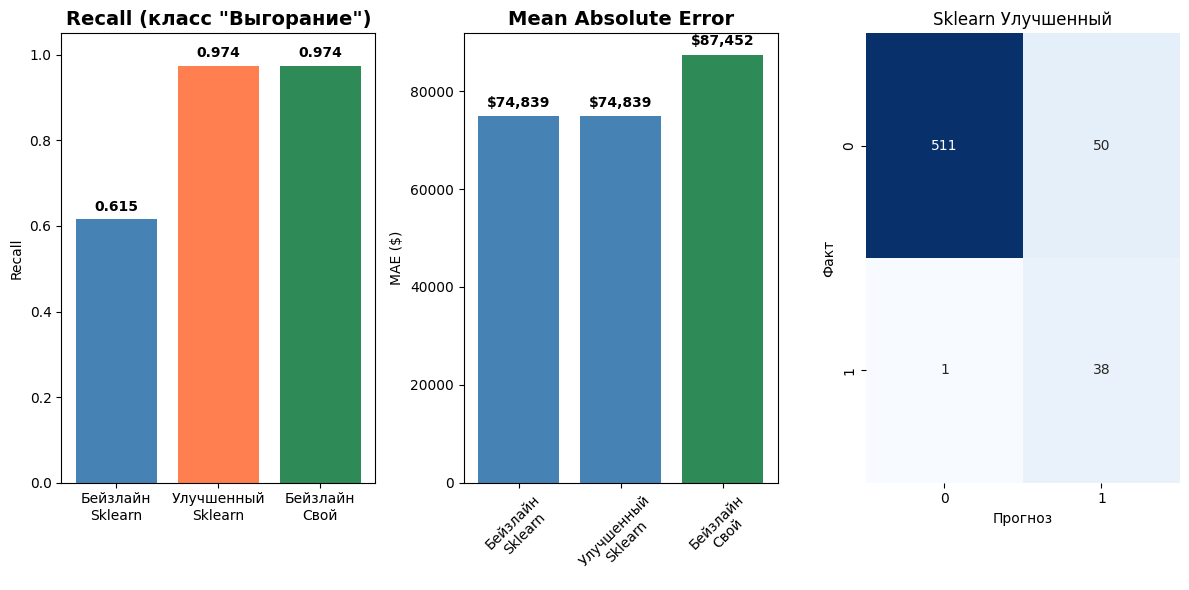

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

stages = ['Бейзлайн\nSklearn', 'Улучшенный\nSklearn', 'Бейзлайн\nСвой']
recall_values = [baseline_clf_metrics['Recall_1'], enhanced_clf_metrics['Recall_1'],
                 custom_clf_metrics['Recall_1']]

bars1 = ax1.bar(stages, recall_values, color=['steelblue', 'coral', 'seagreen', 'lightcoral'])
ax1.set_title('Recall (класс "Выгорание")', fontsize=14, fontweight='bold')
ax1.set_ylabel('Recall')
ax1.set_ylim(0, 1.05)
for i, v in enumerate(recall_values):
    ax1.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

mae_values = [baseline_reg_metrics['MAE'], enhanced_reg_metrics['MAE'],
              custom_reg_metrics['MAE']]

bars2 = ax2.bar(stages, mae_values, color=['steelblue', 'steelblue', 'seagreen', 'seagreen'])
ax2.set_title('Mean Absolute Error', fontsize=14, fontweight='bold')
ax2.set_ylabel('MAE ($)')
for i, v in enumerate(mae_values):
    ax2.text(i, v + 2000, f'${v:,.0f}', ha='center', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)


cm_enhanced = confusion_matrix(y_test_clf, y_pred_enh_clf)
sns.heatmap(cm_enhanced, annot=True, fmt='d', cmap='Blues', ax=ax3, cbar=False)
ax3.set_title('Sklearn Улучшенный')
ax3.set_xlabel('Прогноз')
ax3.set_ylabel('Факт')


plt.tight_layout()
plt.savefig('results/final_comparison_all_stages.png', dpi=300, bbox_inches='tight')
plt.show()